In [1]:
%reload_ext autoreload
%autoreload 2

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [5]:
from manofunkcijos import *





In [66]:
DB = cnt.connect(
    host='88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C = DB.cursor()


In [ ]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""paste SQL command here!"""
C.execute(sql)
ans = C.fetchall()
? = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [7]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select lytis, count(*), avg(bdu_spalio) 
from DUS2014N 
GROUP BY lytis"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [8]:
pout(ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [16]:
atlyginimas = list(map(lambda x: x/3.4528, atlyginimas))

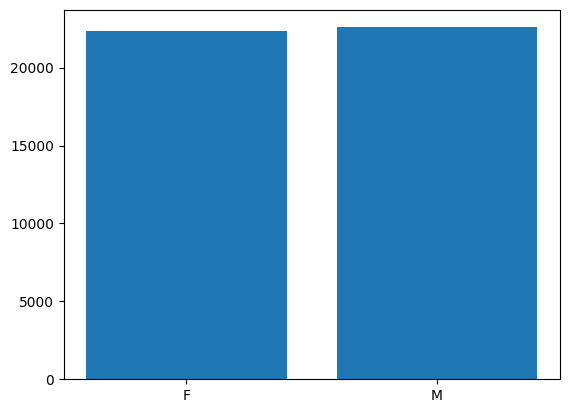

In [17]:
fig, axis = plt.subplots()

axis.bar(lytis, kiekis)

plt.show()

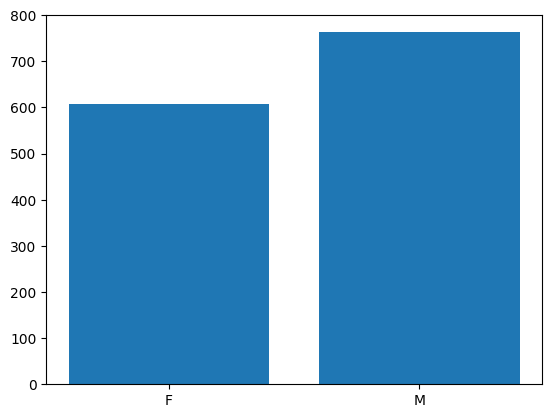

In [18]:
fig, axis = plt.subplots()

axis.bar(lytis, atlyginimas)

plt.show()

In [20]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))
pout(ans)

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


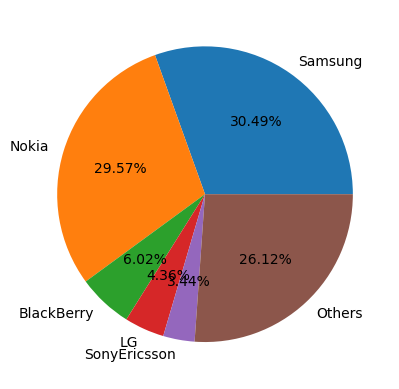

In [22]:
fig, axis = plt.subplots()

axis.pie(kiekiai, labels=gamintojai, autopct = '%.2f%%')

plt.show()

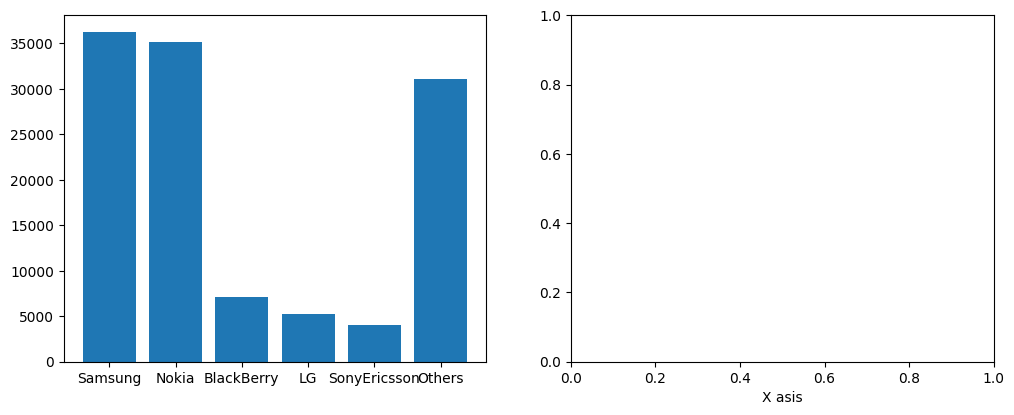

In [42]:
fig, axes = plt.subplots(1,2, figsize = [12,4.5])

axes[0].bar(gamintojai, kiekiai)
axes[1].set_xlabel('X asis')
plt.show()

In [46]:
# -- Kiek respondentų dalyvavo apklausoje 2014 bei 2018 metais iš kiekvienos amžiaus grupės?


#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select AG, D1.Dalyviai as D14, D2.Dalyviai as D18  from
(SELECT count(*) as Dalyviai, 
case
when amzius = '14-19' then '14-29'
when amzius = '20-29' then '14-29'
else amzius
end as AG, lytis
FROM DUS2014N
where lytis ='f'
group by AG
) as D1
join
(SELECT count(*) as Dalyviai, amzius as AG FROM DUS2018N
where lytis = 'f'
group by AG) as D2
using (AG);
"""
C.execute(sql)
ans = C.fetchall()
AGF, DF14, DF18 = list(map(list, zip(*ans)))
pout(ans,20)


print('\n')


sql="""
select AG, D1.Dalyviai as D14, D2.Dalyviai as D18 from
(SELECT count(*) as Dalyviai, 
case
when amzius = '14-19' then '14-29'
when amzius = '20-29' then '14-29'
else amzius
end as AG, lytis
FROM DUS2014N
where lytis ='m'
group by AG
) as D1
join
(SELECT count(*) as Dalyviai, amzius as AG FROM DUS2018N
where lytis = 'm'
group by AG) as D2
using (AG);"""
C.execute(sql)
ans = C.fetchall()
AGM, DM14, DM18 = list(map(list, zip(*ans)))
pout(ans,20)



| 0 |     14-29      |      4080      |      4291      |
| 1 |     30-39      |      4551      |      4118      |
| 2 |     40-49      |      5879      |      4670      |
| 3 |     50-59      |      5956      |      5186      |
| 4 |      60+       |      1900      |      2423      |


| 0 |     14-29      |      5282      |      5077      |
| 1 |     30-39      |      5196      |      5164      |
| 2 |     40-49      |      5068      |      4751      |
| 3 |     50-59      |      5012      |      4870      |
| 4 |      60+       |      2028      |      2614      |


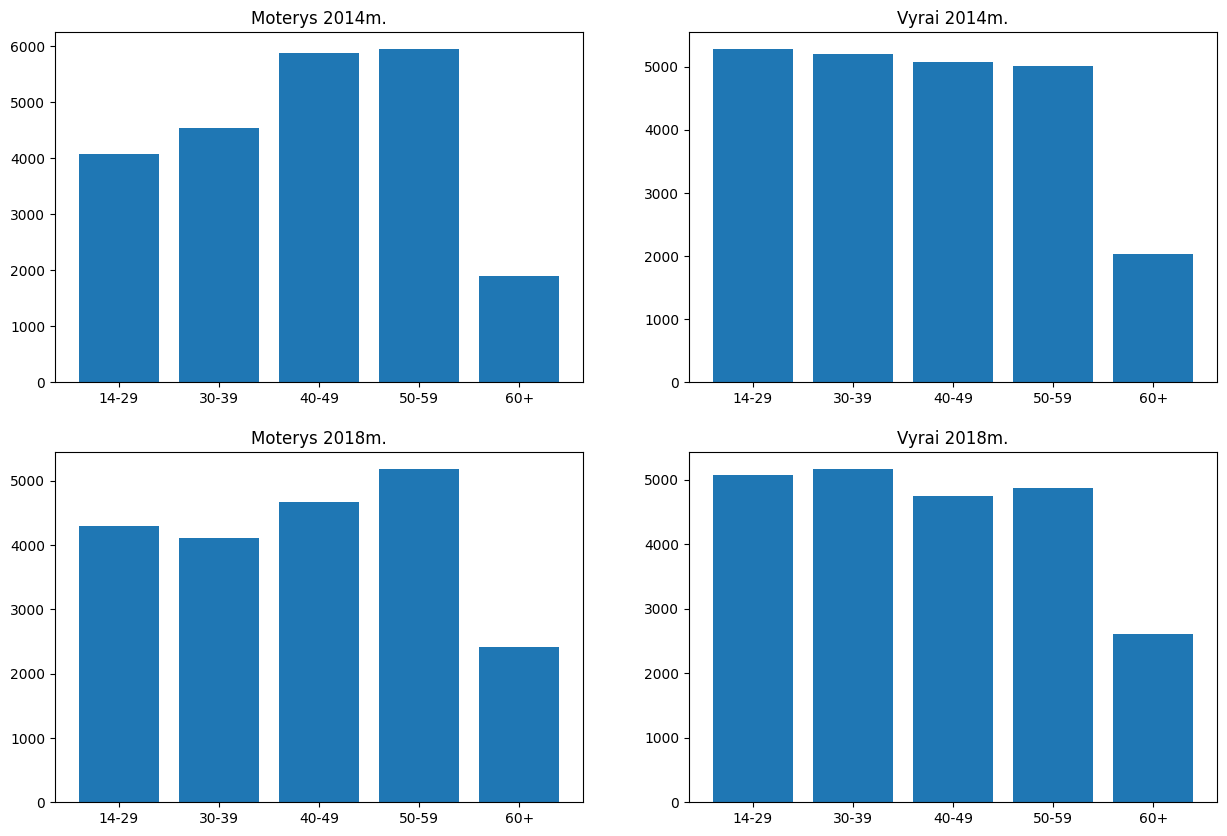

In [52]:
fig, axes = plt.subplots(2,2, figsize = [15,10])

axes[0,0].bar(AGF, DF14)
axes[0,0].set_title('Moterys 2014m.')
axes[0,1].bar(AGM, DM14)
axes[0,1].set_title('Vyrai 2014m.')
axes[1,0].bar(AGF, DF18)
axes[1,0].set_title('Moterys 2018m.')
axes[1,1].bar(AGM, DM18)
axes[1,1].set_title('Vyrai 2018m.')
plt.show()

In [54]:
# 2018 metams, parodykite vaizdžiai vidutinio atlyginimo priklausomybę nuo amžiaus grupės, atskirai vyrams, atskirai moterims.

sql="""select AG, A1.`Vidutinis atlyginimas` as M18, A2.`Vidutinis atlyginimas` as F18 from
(SELECT round(avg(bdu_spalio),0) as `Vidutinis atlyginimas`, amzius as AG FROM DUS2018N
where lytis = 'm'
group by amzius) as A1
join
(SELECT round(avg(bdu_spalio),0) as `Vidutinis atlyginimas`, amzius as AG FROM DUS2018N
where lytis = 'f'
group by amzius) as A2
using (AG);"""
C.execute(sql)
ans = C.fetchall()
AG, M18, F18 = list(map(list, zip(*ans)))
pout(ans,20)

| 0 |     14-29      |      940       |      778       |
| 1 |     30-39      |      1183      |      971       |
| 2 |     40-49      |      1072      |      888       |
| 3 |     50-59      |      939       |      778       |
| 4 |      60+       |      861       |      702       |


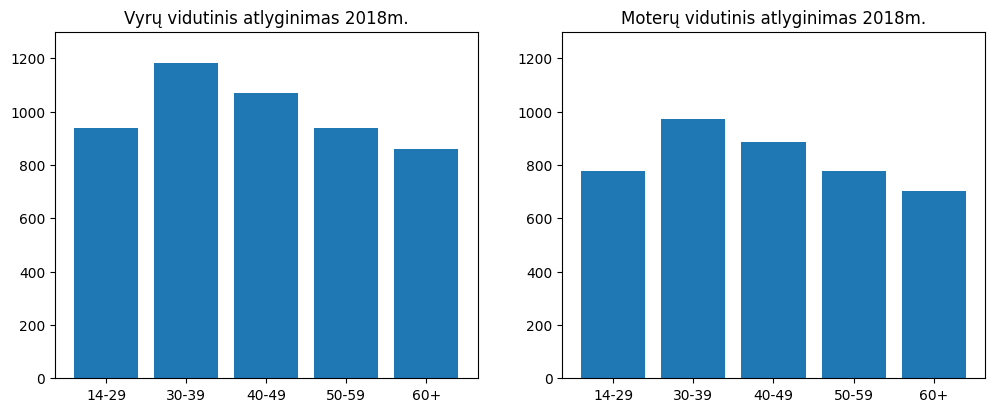

In [60]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [12,4.5])

ax1.bar(AG, M18)
ax1.set_title('Vyrų vidutinis atlyginimas 2018m.')
ax1.set_ylim(0,1300)
ax2.bar(AG, F18)
ax2.set_title('Moterų vidutinis atlyginimas 2018m.')
ax2.set_ylim(0,1300)
plt.show()

In [81]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with A as 
(select amzius, avg(bdu_spalio)
from DUS2018N
where lytis = 'F'
group by amzius),
B as
(
select amzius, avg(bdu_spalio)
from DUS2018N
where lytis = 'M'
group by amzius
)
select * from A join B using (amzius);"""
C.execute(sql)
ans = C.fetchall()
amzius, mot, vyr = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |    777.5348    |    939.9636    |
| 1 |     30-39      |    971.0401    |   1182.9868    |
| 2 |     40-49      |    887.6261    |   1072.4953    |
| 3 |     50-59      |    777.8344    |    939.3762    |
| 4 |      60+       |    702.1246    |    860.9380    |


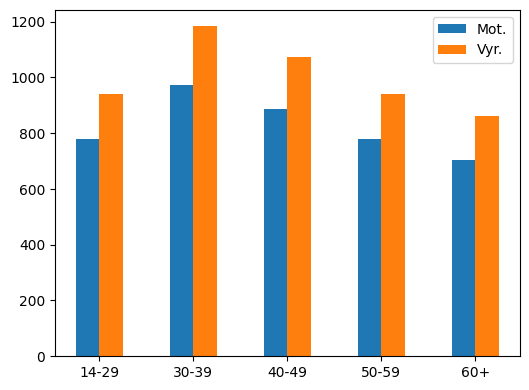

In [82]:
fig, axis = plt.subplots(figsize=[6,4.5])

x = np.arange(0,len(amzius))
w = 0.25
axis.bar(x-w/2,mot, label='Mot.', width=w)
axis.bar(x+w/2, vyr, label='Vyr.', width=w)

axis.set_xticks(x)
axis.set_xticklabels(amzius)

axis.legend(loc='best')
plt.show()

In [90]:
# -- Raskite 5-kis populiariausius autopliuslt skelbimuose  
# -- esančius gamintojus, suraskite, kokia buvo kiekvienam  
# -- iš šių gamintojų automobilių vidutinė kaina, rida,  
# -- automobilių amžius. (viena kompleksinė SQL užklausa)
# -- vizualizuokite šią informaciją stulpeline ar kitokia diagrama

sql="""select gamintojas, count(*) as kiek, round(avg(cast(replace(price,' ','') as float)),0) as avgp,
 round(avg(cast(replace(replace(rida,' ',''),'km','')as float)),0) as rid, 
 round(avg(2024-substring(pagaminimo_data,1,4)),2) as amzius from autopliuslt
 where rida <> 'nenurodyta'
group by gamintojas
order by kiek desc
limit 5;"""
C.execute(sql)
ans = C.fetchall()
marke, kiekis, kaina, rida, amzius = list(map(list, zip(*ans)))
pout(ans,20)


| 0 |      BMW       |      361       |    10721.0     |    263543.0    |      15.2      |
| 1 |   Volkswagen   |      299       |     6358.0     |    246394.0    |     15.59      |
| 2 |      Audi      |      217       |     8787.0     |    252499.0    |     16.35      |
| 3 | Mercedes-Benz  |      174       |    15295.0     |    265764.0    |     15.11      |
| 4 |     Toyota     |      147       |     8582.0     |    211363.0    |     14.53      |


In [72]:
type(kiekis[0])

int

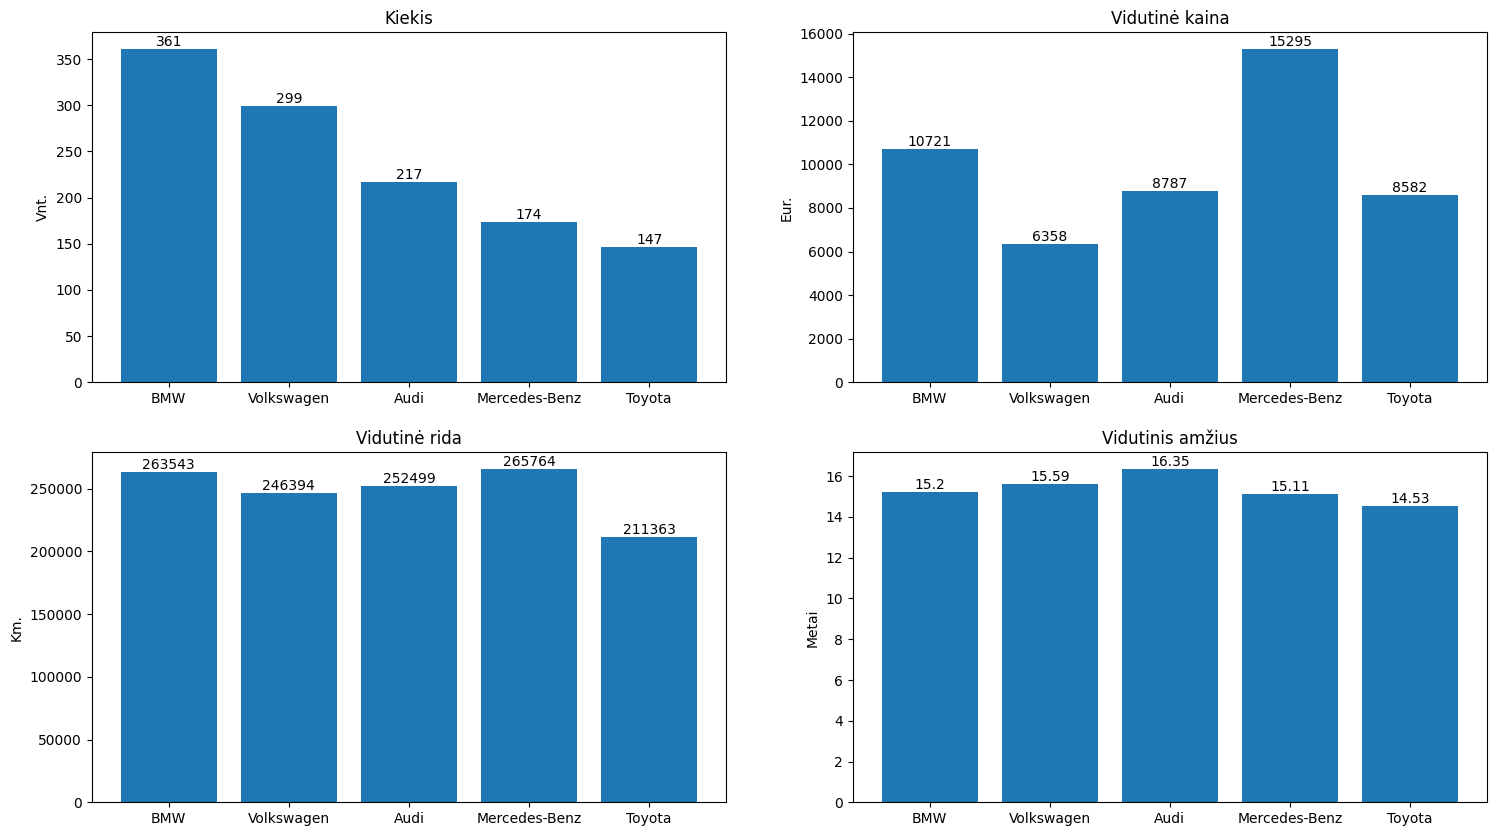

In [91]:
fig, axes = plt.subplots(2,2,figsize=[18,10])

a=axes[0,0].bar(marke, kiekis)
axes[0,0].bar_label(a)
axes[0,0].set_title('Kiekis')
axes[0,0].set_ylabel('Vnt.')
b=axes[0,1].bar(marke, kaina)
axes[0,1].bar_label(b)
axes[0,1].set_title('Vidutinė kaina')
axes[0,1].set_ylabel('Eur.')
c=axes[1,0].bar(marke, rida)
axes[1,0].bar_label(c)
axes[1,0].set_title('Vidutinė rida')
axes[1,0].set_ylabel('Km.')
d=axes[1,1].bar(marke, amzius)
axes[1,1].bar_label(d)
axes[1,1].set_title('Vidutinis amžius')
axes[1,1].set_ylabel('Metai')
# x = np.arange(0,len())
# w = 0.25
# axis.bar(x-w/2,mot, label='Mot.', width=w)
# axis.bar(x+w/2, vyr, label='Vyr.', width=w)

# axis.set_xticks(x)
# axis.set_xticklabels(amzius)

# axis.legend(loc='best')
plt.show()

In [95]:
# -- Sugrupuokite automobilius pagal jų amžių, ir suraskite
# -- vidutinę kainą kiekvienam amžiui.
# -- Ar didėjant automobilių amžiui, jų kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.
sql="""select round(avg(cast(replace(price,' ','') as float)),0) as avgp,
 round(2024-substring(pagaminimo_data,1,4),0) as amzius from autopliuslt
group by amzius
order by amzius asc
;"""
C.execute(sql)
ans = C.fetchall()
kaina, amzius = list(map(list, zip(*ans)))
pout(ans,20)






Rodoma 20 eilutės iš 47
| 0 |    44400.0     |      1.0       |
| 1 |    39308.0     |      2.0       |
| 2 |    28709.0     |      3.0       |
| 3 |    46249.0     |      4.0       |
| 4 |    23035.0     |      5.0       |
| 5 |    23320.0     |      6.0       |
| 6 |    19454.0     |      7.0       |
| 7 |    18120.0     |      8.0       |
| 8 |    17172.0     |      9.0       |
| 9 |    11629.0     |      10.0      |
|10 |     8265.0     |      11.0      |
|11 |     8244.0     |      12.0      |
|12 |     7488.0     |      13.0      |
|13 |     6811.0     |      14.0      |
|14 |     5651.0     |      15.0      |
|15 |     4355.0     |      16.0      |
|16 |     3751.0     |      17.0      |
|17 |     3154.0     |      18.0      |
|18 |     2869.0     |      19.0      |
|19 |     2550.0     |      20.0      |


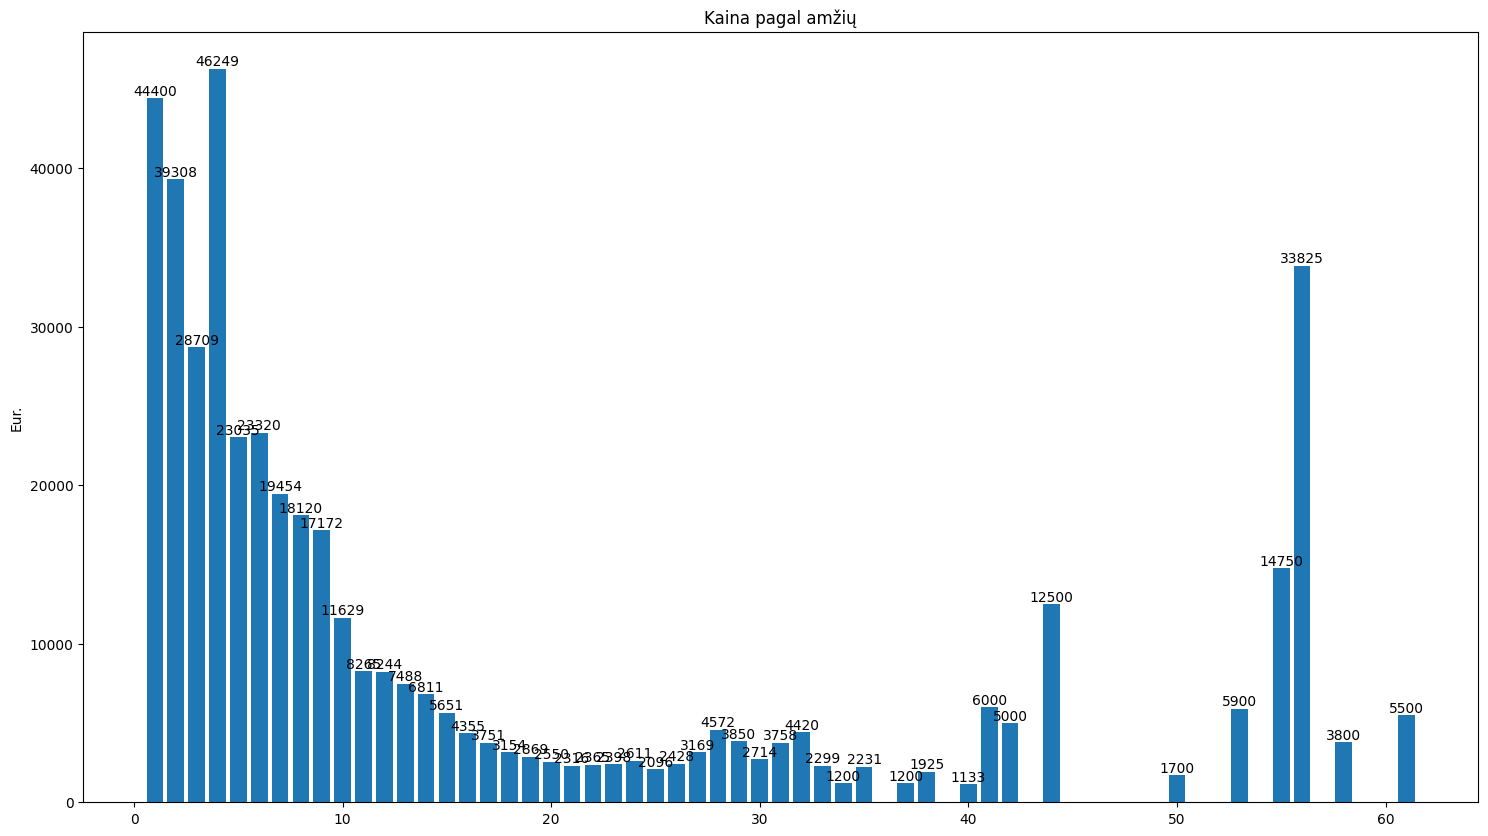

In [96]:
fig, axis = plt.subplots(figsize=[18,10])

a=axis.bar(amzius, kaina)
axis.bar_label(a)
axis.set_title('Kaina pagal amžių')
axis.set_ylabel('Eur.')

# x = np.arange(0,len())
# w = 0.25
# axis.bar(x-w/2,mot, label='Mot.', width=w)
# axis.bar(x+w/2, vyr, label='Vyr.', width=w)

# axis.set_xticks(x)
# axis.set_xticklabels(amzius)

# axis.legend(loc='best')
plt.show()

In [109]:
# -- Sugrupuokite automobilius pagal ridą, intervalais kas 5000 km, ir suraskite vidutinę kainą
# -- kiekviename intervale. Apvalinimas turi būti į
# -- didesnę pusę: 500 km turi tapti 5000 km.
# -- Ar didėjant ridai, automobilių kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.
sql="""select ceil(cast(replace(replace(rida,' ',''),'km','')as float)/5000)*5000 as ridas, round(avg(cast(replace(price,' ','') as float)),0) as avgp  from autopliuslt
where rida <> 'Nenurodyta'
group by ridas
order by ridas asc;"""
C.execute(sql)
ans = C.fetchall()
rida, kaina = list(map(list, zip(*ans)))
pout(ans,20)



Rodoma 20 eilutės iš 107
| 0 |     5000.0     |    25822.0     |
| 1 |    10000.0     |    28285.0     |
| 2 |    15000.0     |    21555.0     |
| 3 |    20000.0     |    41190.0     |
| 4 |    25000.0     |    63494.0     |
| 5 |    30000.0     |    20829.0     |
| 6 |    35000.0     |    31650.0     |
| 7 |    40000.0     |    49650.0     |
| 8 |    45000.0     |    33608.0     |
| 9 |    50000.0     |    27215.0     |
|10 |    55000.0     |    22950.0     |
|11 |    60000.0     |    41772.0     |
|12 |    65000.0     |    25042.0     |
|13 |    70000.0     |    15845.0     |
|14 |    75000.0     |    15657.0     |
|15 |    80000.0     |    15976.0     |
|16 |    85000.0     |    16086.0     |
|17 |    90000.0     |    20629.0     |
|18 |    95000.0     |    16847.0     |
|19 |    100000.0    |    13789.0     |


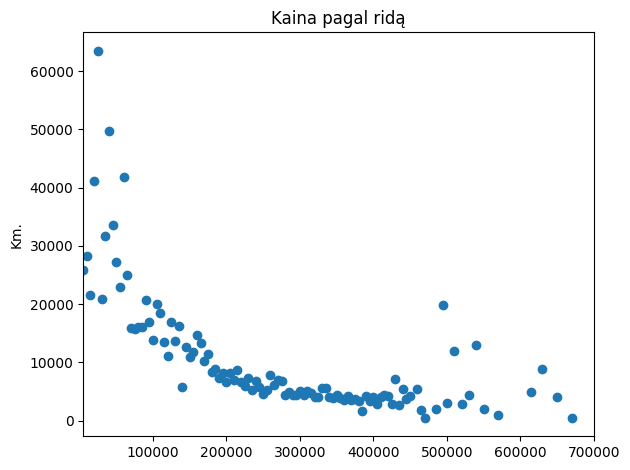

In [113]:
fig, axis = plt.subplots()

axis.scatter(rida,kaina)
axis.set_title('Kaina pagal ridą')
axis.set_ylabel('Km.')
axis.set_xlim(5000,700000)

# x = np.arange(0,len())
# w = 0.25
# axis.bar(x-w/2,mot, label='Mot.', width=w)
# axis.bar(x+w/2, vyr, label='Vyr.', width=w)

# axis.set_xticks(x)
# axis.set_xticklabels(amzius)

# axis.legend(loc='best')
fig.tight_layout()
plt.show()